## Miit Matlani J034
## Spam Classifier

<br> Importing Libraries </br>

In [141]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

<br> Reading Data </br>

In [9]:
data = pd.read_csv('spam.csv', encoding="ISO-8859-1")

In [19]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [25]:
data.shape

(5572, 5)

In [24]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [27]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [31]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

Data Cleaning and Visualization

In [32]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [36]:
data['Length'] = data['v2'].apply(lambda x: len(x))

In [38]:
data.head()

,v1,v2,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [53]:
data['no_of_words'] = data['v2'].apply(lambda x: len(x.split(' ')))
data.head()

,v1,v2,Length,no_of_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,20
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,ham,U dun say so early hor... U c already then say...,49,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13


In [56]:
counts = data.groupby('v1')['v1'].agg('count').values
counts

array([4825,  747], dtype=int64)

<AxesSubplot:xlabel='v1', ylabel='count'>

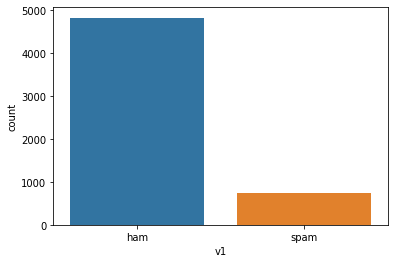

In [67]:
sns.countplot(x = 'v1', data= data)

In [74]:
def v2_clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [75]:
data['v2_clean'] = data['v2'].apply(v2_clean)
data.head()

,v1,v2,Length,no_of_words,v2_clean
0,ham,"Go until jurong point, crazy.. Available only ...",111,20,"go until jurong point, crazy.. available only ..."
1,ham,Ok lar... Joking wif u oni...,29,6,ok lar... joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,free entry in a wkly comp to win fa cup final...
3,ham,U dun say so early hor... U c already then say...,49,11,u dun say so early hor... u c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13,"nah i don't think he goes to usf, he lives aro..."


In [79]:
stop_words = stopwords.words('english')

In [82]:
data['v2_clean'] = data['v2_clean'].apply(lambda x : ' '.join([w for w in x.split() if not w in stop_words]))

In [83]:
data.head()

,v1,v2,Length,no_of_words,v2_clean
0,ham,"Go jurong point, crazy.. Available bugis n gre...",111,20,"go jurong point, crazy.. available bugis n gre..."
1,ham,Ok lar... Joking wif u oni...,29,6,ok lar... joking wif u oni...
2,spam,Free entry 2 wkly comp win FA Cup final tkts 2...,155,28,free entry wkly comp win fa cup final tkts may...
3,ham,U dun say early hor... U c already say...,49,11,u dun say early hor... u c already say...
4,ham,"Nah I think goes usf, lives around though",61,13,"nah think goes usf, lives around though"


Label Encoding

In [94]:
le = LabelEncoder()
le.fit(data['v1'])

data['encoded_v1'] = le.transform(data['v1'])
data.head()

,v1,v2,Length,no_of_words,v2_clean,encoded_v1
0,ham,"Go jurong point, crazy.. Available bugis n gre...",111,20,"go jurong point, crazy.. available bugis n gre...",0
1,ham,Ok lar... Joking wif u oni...,29,6,ok lar... joking wif u oni...,0
2,spam,Free entry 2 wkly comp win FA Cup final tkts 2...,155,28,free entry wkly comp win fa cup final tkts may...,1
3,ham,U dun say early hor... U c already say...,49,11,u dun say early hor... u c already say...,0
4,ham,"Nah I think goes usf, lives around though",61,13,"nah think goes usf, lives around though",0


In [106]:
x = data['v2_clean']
y = data['encoded_v1']

print(len(x), len(y))

5572 5572


TF-IDF Vectorizer

In [111]:
tfidf_vectorizer = TfidfVectorizer(max_df = 0.9 , min_df = 2 , stop_words = 'english' , max_features = 100)
data_t = tfidf_vectorizer.fit_transform(data['v2_clean'])

Train Test Split

In [114]:
x_train, x_test, y_train, y_test = train_test_split(data_t, y, test_size=0.20, random_state=42)

<br> Modelling </br>

1. Naive Bayes

In [119]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train, y_train)
nb_pred = nb.predict(x_test)

In [122]:
metrics.confusion_matrix(y_test, nb_pred)

array([[954,  11],
       [ 49, 101]], dtype=int64)

In [128]:
print(metrics.classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       965
           1       0.90      0.67      0.77       150

    accuracy                           0.95      1115
   macro avg       0.93      0.83      0.87      1115
weighted avg       0.94      0.95      0.94      1115



2. Logistic Regression

In [116]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train , y_train)
pred = lr.predict(x_test)

In [117]:
metrics.confusion_matrix(pred , y_test)

array([[955,  50],
       [ 10, 100]], dtype=int64)

In [118]:
print(metrics.classification_report(pred , y_test))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1005
           1       0.67      0.91      0.77       110

    accuracy                           0.95      1115
   macro avg       0.83      0.93      0.87      1115
weighted avg       0.96      0.95      0.95      1115



3. Decision Tree

In [130]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0, splitter='random', max_features='auto')
dtc.fit(x_train,y_train)
pred2 = dtc.predict(x_test)
print(metrics.confusion_matrix(y_test,pred2))

[[946  19]
 [ 44 106]]


In [131]:
print(metrics.classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       965
           1       0.85      0.71      0.77       150

    accuracy                           0.94      1115
   macro avg       0.90      0.84      0.87      1115
weighted avg       0.94      0.94      0.94      1115



4. Random Forest Classifier

In [132]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train,y_train)
pred3 = rfc.predict(x_test)
print(metrics.confusion_matrix(y_test,pred3))

[[955  10]
 [ 40 110]]


In [133]:
print(metrics.classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       965
           1       0.92      0.73      0.81       150

    accuracy                           0.96      1115
   macro avg       0.94      0.86      0.89      1115
weighted avg       0.95      0.96      0.95      1115



5. Gradient Boosting

In [135]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(x_train,y_train)
pred4 = gbc.predict(x_test)
print(metrics.confusion_matrix(y_test,pred4))

[[959   6]
 [ 45 105]]


In [136]:
print(metrics.classification_report(y_test,pred4))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       965
           1       0.95      0.70      0.80       150

    accuracy                           0.95      1115
   macro avg       0.95      0.85      0.89      1115
weighted avg       0.95      0.95      0.95      1115



6. SVM

In [137]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
pred5 =svc.predict(x_test)
print(metrics.confusion_matrix(y_test,pred5))

[[959   6]
 [ 43 107]]


In [138]:
print(metrics.classification_report(y_test,pred5))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       965
           1       0.95      0.71      0.81       150

    accuracy                           0.96      1115
   macro avg       0.95      0.85      0.89      1115
weighted avg       0.96      0.96      0.95      1115



7. ADA Boosting Classifier

In [139]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(random_state = 42, learning_rate = 0.1)
abc.fit(x_train,y_train)
pred6 = abc.predict(x_test)
print(metrics.confusion_matrix(y_test,pred6))

[[964   1]
 [ 88  62]]


In [140]:
print(metrics.classification_report(y_test,pred6))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       965
           1       0.98      0.41      0.58       150

    accuracy                           0.92      1115
   macro avg       0.95      0.71      0.77      1115
weighted avg       0.93      0.92      0.91      1115



<br> Model Summary </br>
<br> Off all the models Random Forest and SVM performed the best. </br>